In [1]:
!pip install missingno

# 1. Importing Libraries

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
from datetime import date
from datetime import time
from scipy import stats


# 2. Loading Data

In [3]:
df_train = pd.read_csv('df_train.csv') # load the train data
df_test = pd.read_csv('df_test.csv')   # load the test data


# 3. Exploratory Data Analysis (EDA)


In [4]:
# Observing our train dataset

In [5]:
df_train.head(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [6]:
df_train

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


# Examining Dataset

In the above train dataset, we realized that at some point our dataset was truncated and we couldnt see all the columns in the train dataset.

In [7]:
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

# Observations

Using the .columns feature, we were then able to see other columns that were hidden in our train dataset

In [8]:
#checking for null values
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

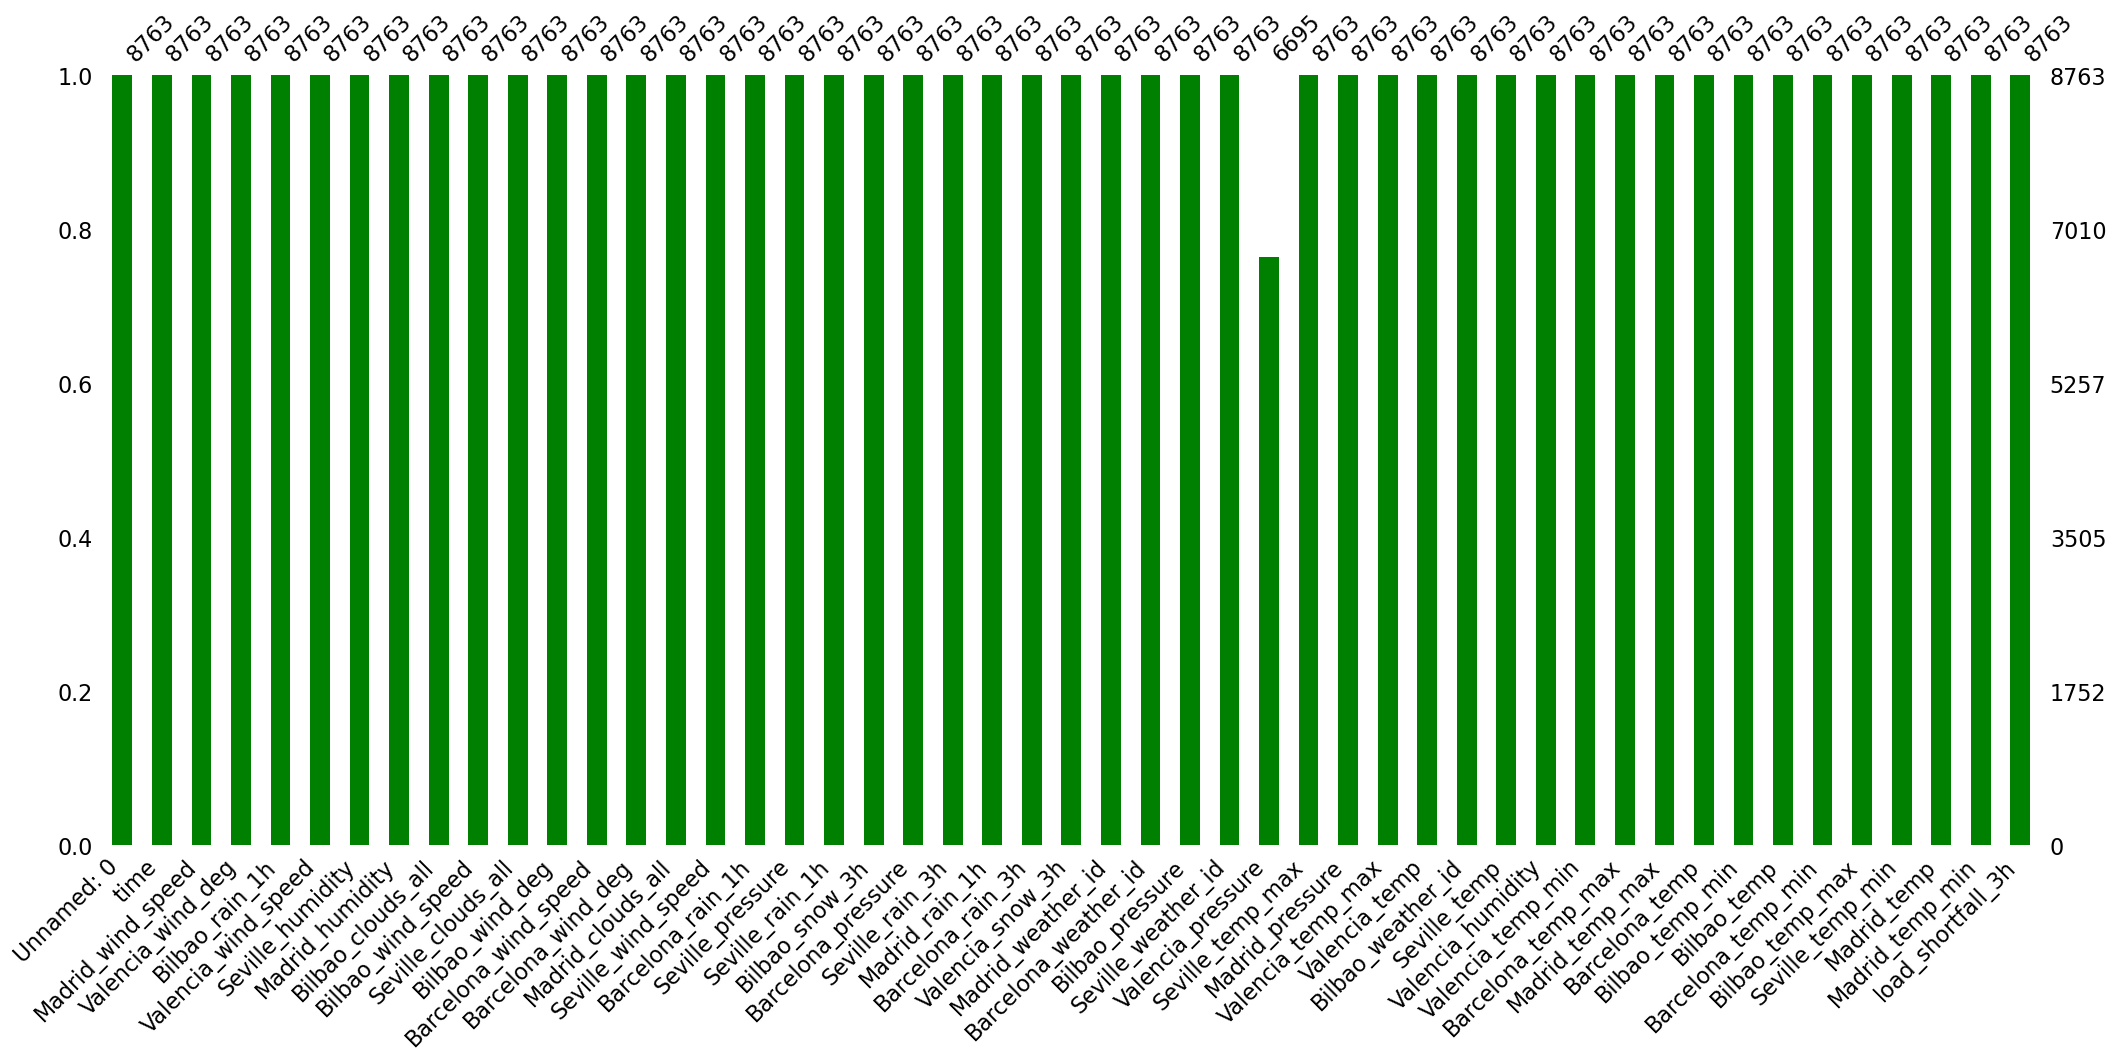

In [9]:
#visualizing null values

msno.bar(df_train,color='green')
plt.show()


# Examining the data

when looking into our data and checking for null values, overall our data is clean except for Valencia_pressure showing 2068 missing values which can either be dropped or imputed.

# Merging datasets to simplify work

Merging datasets is the process of combining two or more datasets into a single dataset. This is usually done when the datasets contain related information that needs to be analysed together.There are numerous ways to merge datasets in Python using different libraries, but for us we will be using the concatination method.This method is used to stack datasets on top of each other or side by side. It is useful when the datasets have the same columns and you want to combine them vertically or horizontally. It can be done using the pandas concat() function.The process of merging datasets will allow us to work with ease.The reason we merged our datasets is so that whatever we do for one column it happens for the other dataset,in this case we are avoiding to duplicated our work and we only need to do it one time.

In [10]:
large_df=pd.concat([df_train, df_test])
large_df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [11]:
large_df.shape

(11683, 49)

# Observations

After merging out two datasets(train and test datasets) we that looked into our dataset shape, and we observed that our dataset became larger/bigger but only for the row values.

In [12]:
# Checking for null values in our larger dataset

large_df.tail(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


In [13]:
large_df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

# Examining the data

When looking into our large dataset,we can now see that Valencia_pressure null values increased from 2068 (train dataset only) to 2522 ,due to the fact that the null values for Valencia_pressure in the train and test datasets are now added together in this large dataset.We also observed that we have 2920 nulls for load_shortfall_3h, which is acceptable because it the the size of our test dataset.

In [18]:
#Checking Datatypes for our large_df

large_df.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

# Examining the data types of our large_dataset

When looking into our dataset , we discovered that we have the "object" data type for the time, Valencia_wind_deg, and Seville_pressure columns."Object" data type typically indicates that a column contains non-numeric values. When working with a dataset, it's essential to understand the data types of each column,as this can affect how you manipulate and analyze the data.We are going to use the drop and transform method to convert the object data types to numeric data types a before performing certain calculations or visualizations. 

In [14]:
#looking at data statistics

large_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11683.0,5841.000000,3372.735932,0.000000,2920.500000,5841.000000,8761.500000,1.168200e+04
Madrid_wind_speed,11683.0,2.433750,1.831762,0.000000,1.000000,2.000000,3.333333,1.333333e+01
Bilbao_rain_1h,11683.0,0.118698,0.334918,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,11683.0,2.692873,2.321759,0.000000,1.000000,2.000000,3.666667,5.200000e+01
Seville_humidity,11683.0,63.774687,22.219380,8.333333,46.333333,67.000000,83.000000,1.000000e+02
Madrid_humidity,11683.0,58.721818,24.390621,6.333333,38.000000,59.333333,80.000000,1.000000e+02
Bilbao_clouds_all,11683.0,43.440712,32.046215,0.000000,12.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,11683.0,1.958629,1.696043,0.000000,1.000000,1.333333,2.666667,1.266667e+01
Seville_clouds_all,11683.0,14.155268,24.541321,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,11683.0,159.878855,101.005654,0.000000,76.666667,145.666667,233.333333,3.600000e+02


C:\Users\Maggie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


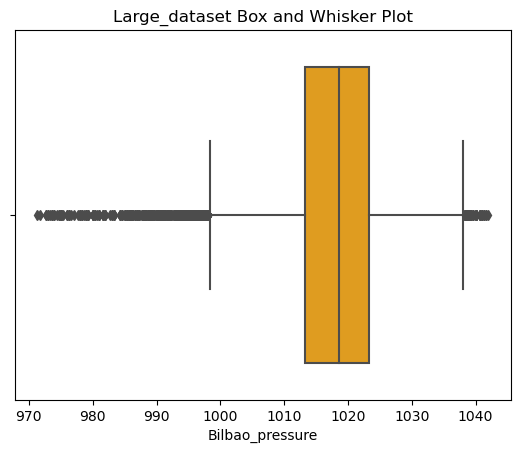

In [15]:
#create box plot using seaborn
sns.boxplot(large_df['Bilbao_pressure'],color= 'orange')

# add labels
plt.title('Large_dataset Box and Whisker Plot')

# show plot
plt.show()

In [16]:
#using the python functions to print out the values for our box and whisker to visually see them

print('Mode')
print (large_df['Bilbao_pressure'].mode())
print('Mean')
print (large_df['Bilbao_pressure'].mean())
print('Median')
print (large_df['Bilbao_pressure'].median())


Mode
0    1021.0
Name: Bilbao_pressure, dtype: float64
Mean
1017.4820108990272
Median
1018.6666666667


# Examining our data statistics

Looking into our data statistics,we observed that from the mean column, we can see that there are some values which are far beyond the range e.g Barcelona_pressure,Madrid_pressure,Valencia_pressure,Bilbao_pressure ,which indicates to us that the maximum value would interfare with how our outliers are going to look like.

we 

C:\Users\Maggie\AppData\Local\Temp\ipykernel_10348\3107271791.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  large_df.kurtosis().plot(color='orange')


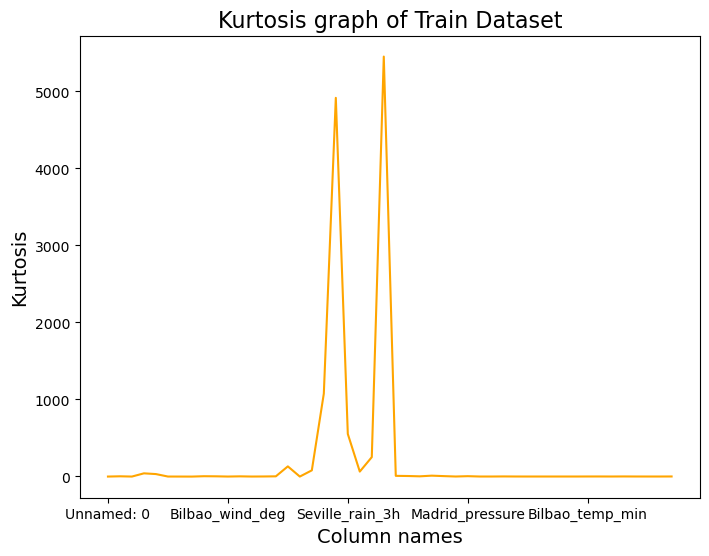

In [42]:
#Checking the skweness of the dataset

fig, ax = plt.subplots(figsize=(8,6)) # Adjust the size of the plot
large_df.kurtosis().plot(color='orange')
plt.title('Kurtosis graph of Train Dataset', fontsize=16) # Add a title to the plot
plt.xlabel('Column names', fontsize=14) # Label the x-axis
plt.ylabel('Kurtosis', fontsize=14) # Label the y-axis

plt.show() # Display the plot

In [43]:
#Checking for outliers in the different columns
large_df.kurtosis()

C:\Users\Maggie\AppData\Local\Temp\ipykernel_10348\904824482.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  large_df.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.156333
Valencia_wind_deg         -1.205963
Bilbao_rain_1h            40.584429
Valencia_wind_speed       31.014311
Seville_humidity          -0.950169
Madrid_humidity           -1.151940
Bilbao_clouds_all         -1.519626
Bilbao_wind_speed          3.159652
Seville_clouds_all         1.950894
Bilbao_wind_deg           -1.064464
Barcelona_wind_speed       1.519692
Barcelona_wind_deg        -0.967252
Madrid_clouds_all         -0.076188
Seville_wind_speed         1.745508
Barcelona_rain_1h        130.956428
Seville_pressure          -1.234056
Seville_rain_1h           79.440881
Bilbao_snow_3h          1075.823322
Barcelona_pressure      4916.988101
Seville_rain_3h          552.067395
Madrid_rain_1h            63.372354
Barcelona_rain_3h        251.188884
Valencia_snow_3h        5452.830025
Madrid_weather_id          8.018543
Barcelona_weather_id       5.932283
Bilbao_pressure            1.847650
Seville_weather_id        10

# Kurtosis (Ku) is a measure of relative peakedness of a distribution.

* It is a shape parameter that characterizes the degree of peakedness. A distribution is said to be leptokurtic when the degree of peakedness is greater than > 3.
* Following are some columns with large numbers of outliers as shown by Kurtosis >3: Madrid_weather_id,Seville_weather_id_,Barcelona_weather_id,Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h,Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, Barcelona_rain_3h,    
* The outliers observed in Barcelona_pressure are obviously due to some errors, as to a pressure of 3687.564230 is too highand unrealistic. 
*According to research, it has been recorded that the maximum Barcelona_pressure ever recorded in history is 1084, and the maximum pressure for the other cities in the dataset are also below this 1084 value.
* Valencia_wind_speed has a maximum of 52, which indicates that there could be something wrong with that value. The highest wind speed recorded in history is 20.This value should also be replaced or dropped.
* The outliers in the other features can maybe be attributed to a significant change in weather conditions on the day that the data was collected and hence we can leave them. 


# 4. Data Engineering

# Imputing null values for Valencia_pressure

In this case, we are going to impute our nulls values for Valencia_pressure with the mode. We wanted to use the most occuring value in our dataset because thats what pressure is. Pressure turns to repeat itself more often than not and mode seem to be the best statistical way to put it.

In [19]:
large_df_cleaning = large_df
large_df_cleaning['Valencia_pressure'] = large_df_cleaning['Valencia_pressure'].fillna(large_df_cleaning['Valencia_pressure'].mode()[0])

In [20]:
large_df_cleaning.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

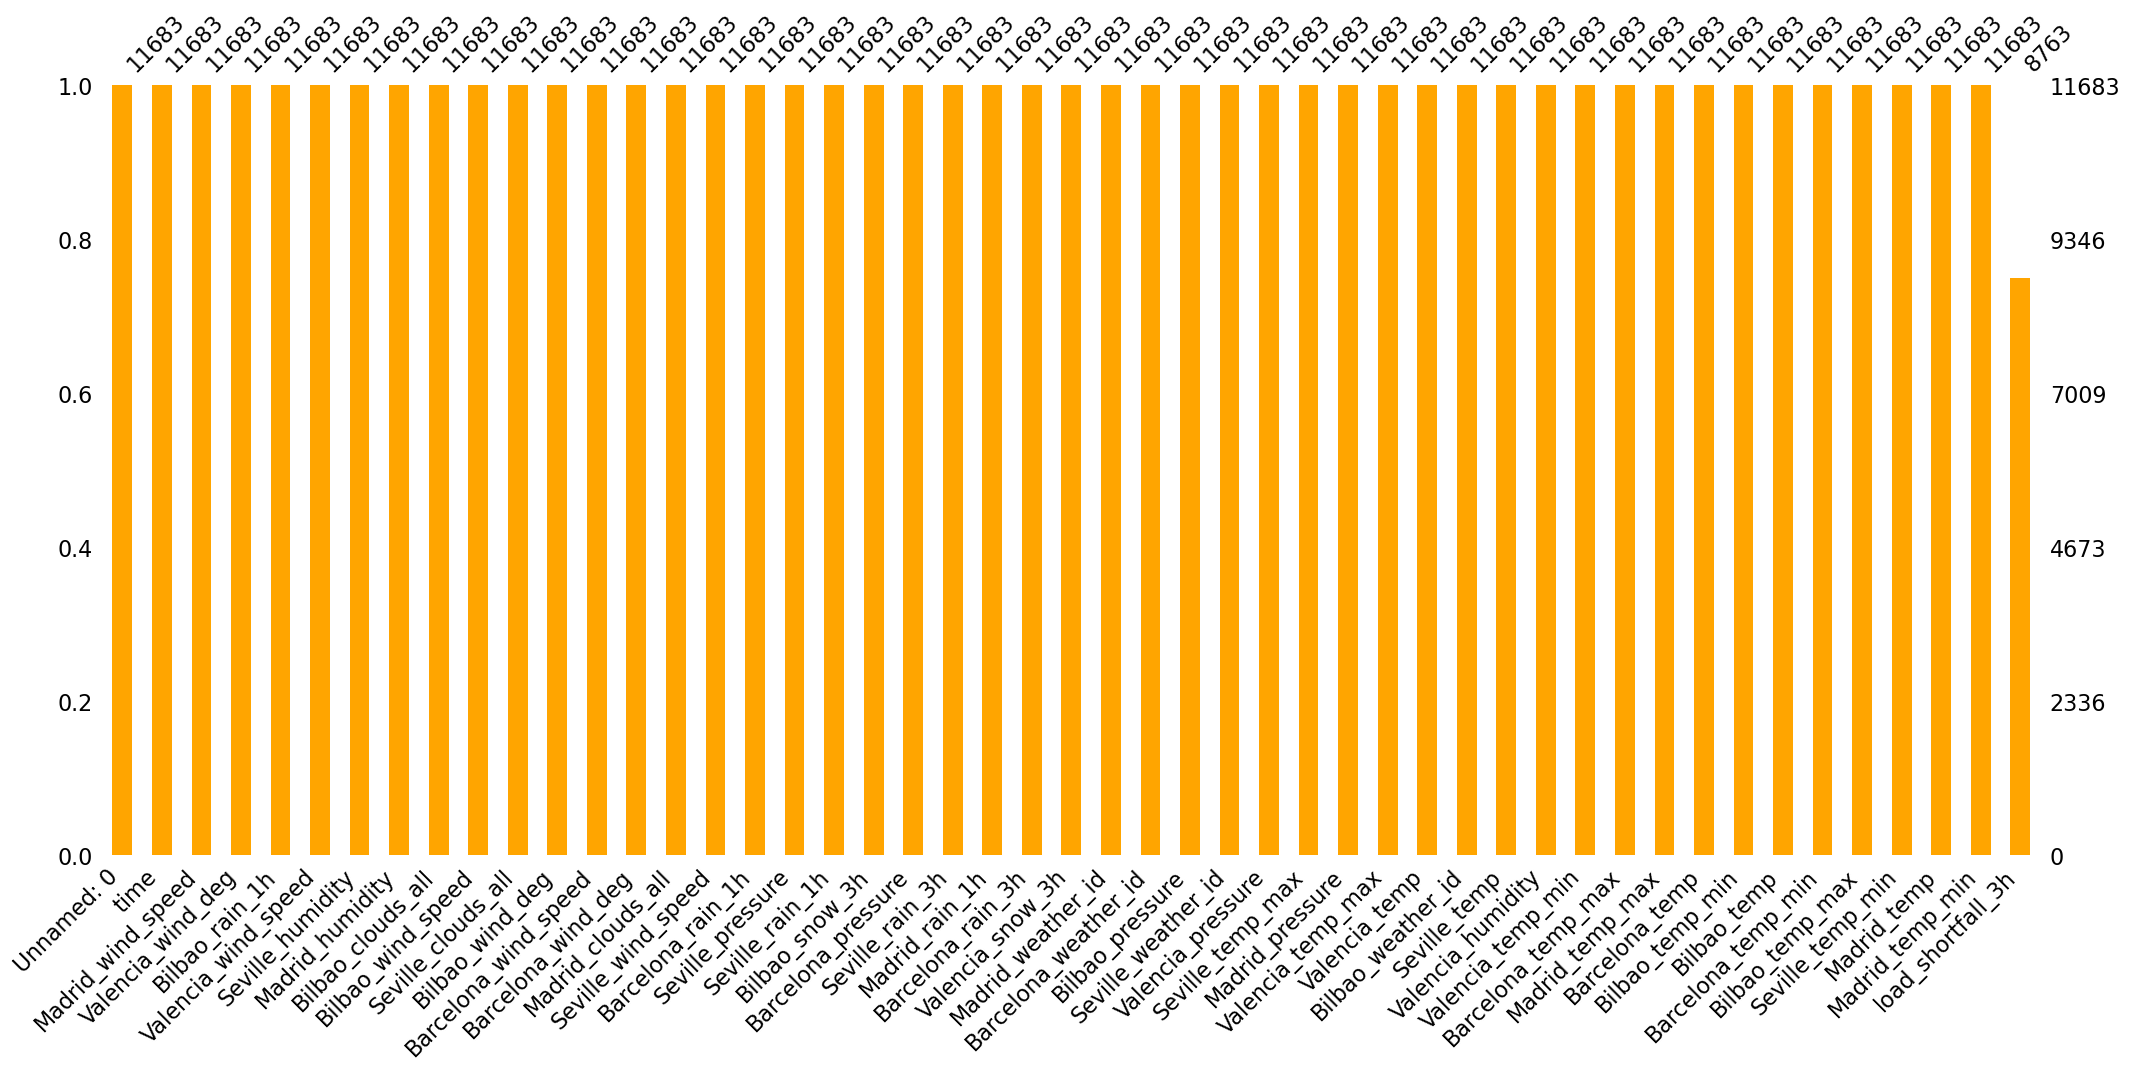

In [21]:
#visualizing null values

msno.bar(large_df_cleaning,color='orange')
plt.show()

# Observations

After imputing the null values, we now observed that there are no null values for Valencia_pressure.We only have nulls for load_shortfall_3h, which is fine, we cannot impute nulls there.

# Converting time dtype to datetime

In [22]:
#transorming/converting the time colum dataype

large_df_cleaning['time']

0       2015-01-01 03:00:00
1       2015-01-01 06:00:00
2       2015-01-01 09:00:00
3       2015-01-01 12:00:00
4       2015-01-01 15:00:00
               ...         
2915    2018-12-31 09:00:00
2916    2018-12-31 12:00:00
2917    2018-12-31 15:00:00
2918    2018-12-31 18:00:00
2919    2018-12-31 21:00:00
Name: time, Length: 11683, dtype: object

In [23]:
large_df_cleaning['time']=pd.to_datetime(large_df_cleaning['time'])

In [24]:
large_df_cleaning.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
2915   2018-12-31 09:00:00
2916   2018-12-31 12:00:00
2917   2018-12-31 15:00:00
2918   2018-12-31 18:00:00
2919   2018-12-31 21:00:00
Name: time, Length: 11683, dtype: datetime64[ns]

# Observations

After converting our data to the time formt,we observed that the columns information is still the same but the dtype changed to datetime. Ofcos some models can interpet the datetime,but some models (linear-regression)can't because it might be containing some dashes and exclamation marks, so it can't really evaluate it.

In [25]:
t1 = time(21,0,0)

print(t1)

print(type(t1))

21:00:00
<class 'datetime.time'>


In [26]:
d1 = date(2018,12,31)

print(d1)

print(type(d1))

2018-12-31
<class 'datetime.date'>


In [27]:
# hour
print('Hour :',t1.hour)
# minute
print('Minute :',t1.minute)
# second
print('Second :',t1.second)
# microsecond
print('Microsecond :',t1.microsecond)

Hour : 21
Minute : 0
Second : 0
Microsecond : 0


In [28]:
d1 = datetime(2018,12,31,21,0,0)
print(d1)
print(type(d1))

2018-12-31 21:00:00
<class 'datetime.datetime'>


# Converting Valencia_wind_deg to numeric_dtype

In [29]:
#transorming/converting the Valencia_wind_deg colum dataype

large_df_cleaning['Valencia_wind_deg']

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
2915     level_9
2916     level_8
2917     level_6
2918     level_6
2919    level_10
Name: Valencia_wind_deg, Length: 11683, dtype: object

In [30]:
large_df_cleaning['Valencia_wind_deg'] = large_df_cleaning['Valencia_wind_deg'].str.extract('(\d+)')

In [31]:
large_df_cleaning['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: object

In [32]:
large_df_cleaning['Valencia_wind_deg']= pd.to_numeric(large_df_cleaning['Valencia_wind_deg'])

In [33]:
large_df_cleaning['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

# Observations

we can now observe that our Valencia_wind_deg dtype changed from object datatype to numeric(int) datatype

# converting the Seville_pressure to numeric dataype

In [34]:
#transorming/converting the Seville_pressure colum dataype

large_df_cleaning.Seville_pressure

0       sp25
1       sp25
2       sp25
3       sp25
4       sp25
        ... 
2915    sp24
2916    sp24
2917    sp23
2918    sp23
2919    sp23
Name: Seville_pressure, Length: 11683, dtype: object

In [35]:
large_df_cleaning['Seville_pressure']=large_df_cleaning['Seville_pressure'].str.extract('(\d+)')

In [36]:
large_df_cleaning['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: object

In [37]:
large_df_cleaning['Seville_pressure']= pd.to_numeric(large_df_cleaning['Seville_pressure'])

In [38]:
large_df_cleaning['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

# Observations

In [39]:
# we can now observe that our Seville_pressure dtype changed from object to numeric(int) datatype